In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import os 

langs = ['de', 'en']
data_path = '../results/Meta-Llama-3-1-70B-Instruct-htzs'
model_types = ['custom', 'pretrained']

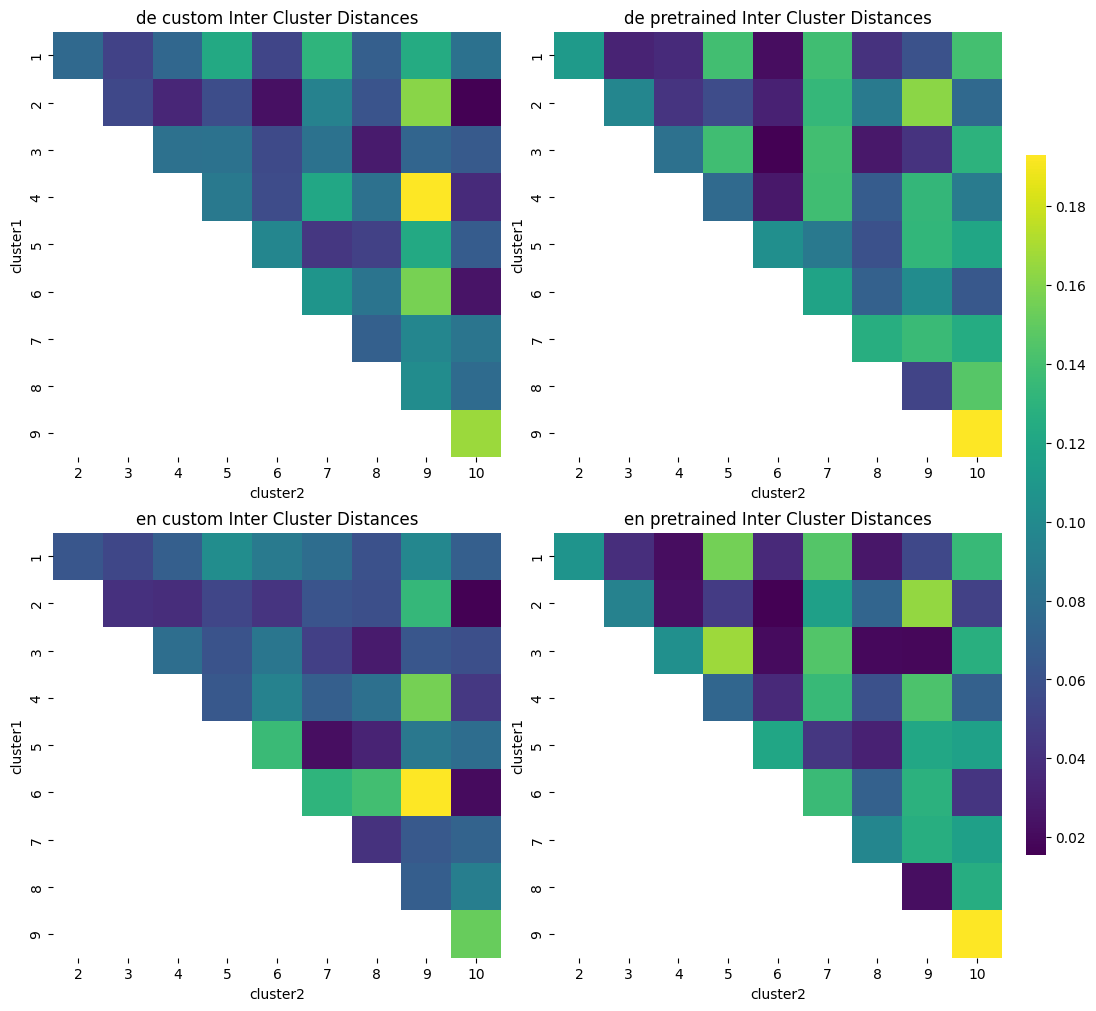

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def plot_inter_cluster_distances(data_path, langs, model_types, adjust_vmin_vmax=False):
    # Collect the minimum and maximum values across all data files for consistent color scaling
    if adjust_vmin_vmax:
        all_min, all_max = float('inf'), float('-inf')
        for lang in langs:
            for model_type in model_types:
                sample_df = pd.read_csv(os.path.join(data_path, lang, model_type, f'inter_cluster_distances_{lang}.csv'))
                sample_df = sample_df.dropna()
                pivot = sample_df.pivot(index='cluster2', columns='cluster1', values='inter_distance').T
                all_min = min(all_min, pivot.min().min())
                all_max = max(all_max, pivot.max().max())

    fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
    cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])  # Shared color bar position

    for i, lang in enumerate(langs):
        for j, model_type in enumerate(model_types):
            ax = axs[i, j]
            sample_df = pd.read_csv(os.path.join(data_path, lang, model_type, f'inter_cluster_distances_{lang}.csv'))
            sample_df = sample_df.dropna()
            pivot = sample_df.pivot(index='cluster2', columns='cluster1', values='inter_distance').T
            
            # Adjust vmin and vmax based on the flag
            vmin = all_min if adjust_vmin_vmax else None
            vmax = all_max if adjust_vmin_vmax else None
            
            sns.heatmap(pivot, ax=ax, cmap='viridis', vmin=vmin, vmax=vmax, 
                        cbar=(i == 0 and j == 0), cbar_ax=None if (i != 0 or j != 0) else cbar_ax)
            ax.set_title(f'{lang} {model_type} Inter Cluster Distances')

        save_path = os.path.join('../visuals/', lang, f'inter_cluster_distances_{lang}.jpg')
        os.makedirs(os.path.dirname(save_path), exist_ok=True)

    # Save the figure once, outside the loop
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

plot_inter_cluster_distances(data_path, langs, model_types, adjust_vmin_vmax=False)

In [2]:
from gensim.models import FastText

In [3]:
model = FastText.load('/scratch/gpfs/vv7118/projects/semantic-accents/embeddings/Meta-Llama-3-1-70B-Instruct-htzs_en/fasttext.model')
model_human = FastText.load('/scratch/gpfs/vv7118/projects/semantic-accents/embeddings/real/human_en/fasttext.model')

In [6]:
model.wv.most_similar('reddit')

[('subreddit', 0.9155521392822266),
 ('subreddits', 0.8102025389671326),
 ('github', 0.7355843186378479),
 ('canvas', 0.7344279289245605),
 ('multimedia', 0.7166547179222107),
 ('microblogging', 0.7134843468666077),
 ('tiktok', 0.7081354856491089),
 ('twitter', 0.7066482305526733),
 ('algorithm', 0.703862190246582),
 ('homepage', 0.6994170546531677)]

In [5]:
model_human.wv.most_similar('reddit')

[('subreddit', 0.9223611354827881),
 ('blogs', 0.7943002581596375),
 ('laptop', 0.7824884057044983),
 ('tiktok', 0.7620711326599121),
 ('parler', 0.7537548542022705),
 ('instagram', 0.7524093389511108),
 ('libs', 0.751181960105896),
 ('uploads', 0.7441213726997375),
 ('twitter', 0.7437366843223572),
 ('wallstreetbets', 0.7436390519142151)]